In [90]:
import pylab as plt
import numpy as np
import swot_ssh_utils as swot
import swot_swell_utils as swell
from cartopy import crs as ccrs
from netCDF4 import Dataset
import xarray as xr
from scipy import ndimage

import sys as sys
import pickle
import glob as glob
import datetime


import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
from matplotlib.pyplot import cm
import cmocean
import cmocean.cm as cmo

#PATH_with_functions = '/home/ardhuin/TOOLS/OPTOOLS/PYTHON/'
#sys.path.append(PATH_with_functions)
from  spectral_analysis_functions import *
plt.rcParams.update({'font.size': 18,'savefig.facecolor':'white'})

cNorm = mcolors.Normalize(vmin=0, vmax=2)
jet = plt.get_cmap('jet')
mpl.rcParams.update({'figure.figsize':[10,6],'axes.grid' : True,'font.size': 14,'savefig.facecolor':'white'})

We have  170 0  files.
fileSWOT = data["fileSWOT"]
cycle = data["cycle"]
tracks = data["tracks"]
side = data["side"]
boxindices = data["boxindices"]
lonc = data["lonc"]
latc = data["latc"]
timec = data["timec"]
trackangle = data["trackangle"]
kx2 = data["kx2"]
ky2 = data["ky2"]
ssh_spec = data["ssh_spec"]
sig0_spec = data["sig0_spec"]
coh = data["coh"]
ang = data["ang"]
amask = data["amask"]
sig0mean = data["sig0mean"]
sig0std = data["sig0std"]
E_SWOT = data["E_SWOT"]
HH = data["HH"]
HH2 = data["HH2"]
Hs_SWOT_filtered_all = data["Hs_SWOT_filtered_all"]
Hs_SWOT_filtered_mask = data["Hs_SWOT_filtered_mask"]
Hs_SWOT_mask = data["Hs_SWOT_mask"]
Lm_SWOT_filtered_mask = data["Lm_SWOT_filtered_mask"]
dm_SWOT_filtered_mask = data["dm_SWOT_filtered_mask"]
modelfound = data["modelfound"]


/tmp/ipykernel_6641/335567009.py:97: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[0].scatter(bigarray[0:-1,10],bigarray[0:-1,2],c=gr,alpha=0.5,linewidth=1,label='SWOT');
/tmp/ipykernel_6641/335567009.py:116: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[1].scatter(bigarray[0:-1,20],bigarray[0:-1,2],c=gr,alpha=0.5,linewidth=1,label='SWOT');
/tmp/ipykernel_6641/335567009.py:139: UserWarning: *c* argument looks like a 

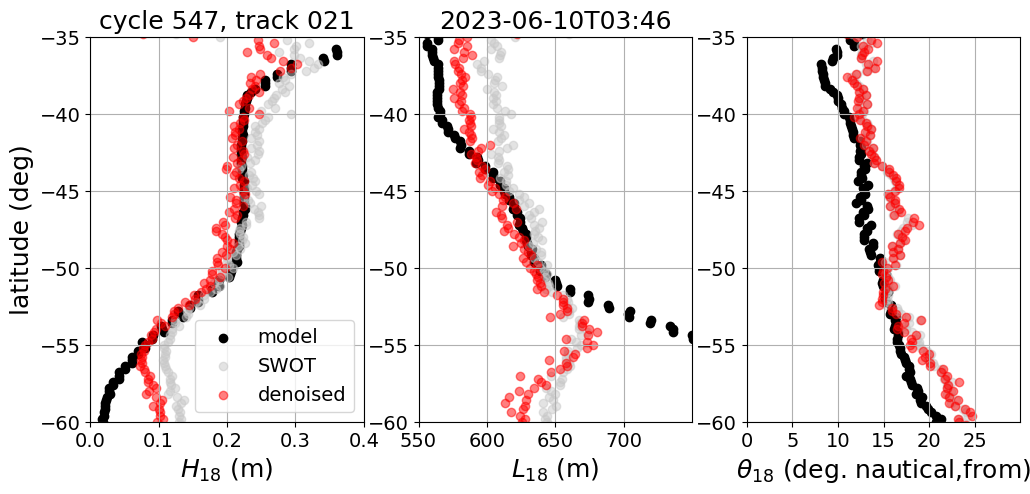

In [213]:
# Note : other tests with different spectral resolution are in directories LOOP, LOOP2, LOOP3


calibration=2
denoise=1

# track for Figure 4.a
#cycle='547';tracks='008';latrange=[-20,-8];Lrange=[500,1100];Lstep=100;thrange=[190,240];thstep=10;Hrange=[0,1.5];locleg='upper right';ileg=0;
# track for Figure 4.b
cycle='547';tracks='021';latrange=[-60,-35];Lrange=[550,750];Lstep=50;thrange=[0,30];thstep=5;Hrange=[0,0.4];locleg='lower right';ileg=0;

# track for Figure S7a
#cycle='548';tracks='017';latrange=[-55,-30];Lrange=[400,1000];Lstep=100;thrange=[180,270];thstep=15;Hrange=[0,3];locleg='lower right';ileg=1;
# track for Figure S7b
#cycle='550';tracks='017';latrange=[-32,0];Lrange=[400,1000];Lstep=100;thrange=[180,240];thstep=15;Hrange=[0,2.5];locleg='upper right';ileg=0;


# track with buoys 
#cycle='545';tracks='010';latrange=[-45,-30];Lrange=[400,800];Lstep=100;thrange=[180,240];thstep=15;Hrange=[0,6];locleg='upper right';ileg=0;
#cycle='546';tracks='010';latrange=[-45,-30];Lrange=[400,800];Lstep=100;thrange=[180,240];thstep=15;Hrange=[0,3];locleg='lower right';ileg=1;


file_lisr = sorted(glob.glob('ANIMATIONS/SWOT_swell_spectra_'+cycle+'_'+tracks+'_left_*.npz'));
#file_list = sorted(glob.glob('LOOP3/SWOT_swell*_'+tracks+'left_*.npz'));
nfiles=len(file_lisr)
file_lisl = sorted(glob.glob('ANIMATIONS/SWOT_swell_spectra_'+cycle+'_'+tracks+'_right_*.npz'));
nfilel=len(file_lisl)
tracktag='cycle '+cycle+', track '+tracks;
print('We have ',nfiles,nfilel,' files.')
bigarray=np.zeros((nfiles+nfilel,50))
indf=0
obpfilter='H2'
for file_list in [file_lisr,file_lisl]:
  #for file_box in file_list:
  for file_box in file_list:
    #print('reading file ',file_box)
    data = np.load(file_box,allow_pickle=True)
    for k in data.keys():
        if (indf==0):
            print(k+' = data["'+k+'"]')
        exec(k+' = data["'+k+'"]')
    
    dlat=np.sin(-trackangle*np.pi/180)
    #mask,bmask=SWOTdefine_swell_mask_simple(E_WW3_noa_H2/HH2,coh,ang,sig0mean,dlat,kx2,ky2,mask_choice=0)
    #mask,bmask=SWOTdefine_swell_mask_simple(E_WW3_noa_H2,coh,ang,sig0mean,dlat,kx2,ky2,mask_choice=0)
    #amask,bmask=SWOTdefine_swell_mask_simple(E_SWOT/HH2,coh,ang,sig0mean,dlat,kx2,ky2,mask_choice=1)
    #mask=ndimage.binary_dilation((amask > 0.5).astype(int))
    
    bigarray[indf,0]=timec
    bigarray[indf,1]=lonc
    bigarray[indf,2]=latc
    bigarray[indf,3]=timeww3
    bigarray[indf,3]=0
    
    HH3=HH*(HH2/HH)**calibration
        
    if obpfilter=='H':
        Hsnew,Lmm1new,Lmnew,dmnew=swell.SWOTspec_to_HsLm(E_SWOT,kx2,ky2,amask,HH,trackangle)
    else:
        Hsnew,Lmm1new,Lmnew,dmnew=swell.SWOTspec_to_HsLm(E_SWOT,kx2,ky2,amask,HH3,trackangle)
    bigarray[indf,10]=Hsnew
    bigarray[indf,20]=Lmm1new
    bigarray[indf,30]=dmnew
    if (denoise==1):
       Ekth,kn1,theta1,Eta_SWOT_nonoise=swell.SWOT_denoise_isotropic(E_SWOT/HH3,kx2,ky2)
       Hsnew,Lmm1new,Lmnew,dmnew=swell.SWOTspec_to_HsLm(Eta_SWOT_nonoise,kx2,ky2,amask,(HH2*0+1),trackangle)
       bigarray[indf,12]=Hsnew
       bigarray[indf,22]=Lmm1new
       bigarray[indf,32]=dmnew
    
    
    b2mask=amask
# uses a slightly wider mask for the model to be sure to catch the full partition 
    #b2mask=ndimage.binary_dilation((amask > 0.5).astype(int))
    #
    if obpfilter=='H':
        Hsnew,Lmm1new,Lmnew,dmnew=swell.SWOTspec_to_HsLm(E_WW3_obp_H,kx2,ky2,b2mask,HH,trackangle)
    else:
        Hsnew,Lmm1new,Lmnew,dmnew=swell.SWOTspec_to_HsLm(E_WW3_obp_H2,kx2,ky2,b2mask,HH2,trackangle)
    bigarray[indf,11]=Hsnew
    bigarray[indf,21]=Lmm1new
    bigarray[indf,31]=dmnew
    indf=indf+1


gr=[0.,205./255.,0.]
fig,axs=plt.subplots(1,3,figsize=(12,5))
vecHs=np.linspace(1,12,23)
if nfiles*nfilel > 0  :
   axs[0].scatter(bigarray[0:nfiles,11],bigarray[0:nfiles,2],c='black',linewidth=1,label='model left');
   axs[0].scatter(bigarray[nfiles+1:-1,11],bigarray[nfiles+1:-1,2],c='blue',linewidth=1,label='model  right');
   axs[0].scatter(bigarray[nfiles+1:-1,10],bigarray[nfiles+1:-1,2],c=gr,linewidth=1,label='SWOT  right');
   axs[0].scatter(bigarray[0:nfiles,10],bigarray[0:nfiles,2],c='red',linewidth=1,label='SWOT left');
else: 
   gr=[200./255.,200./255.,200./255.]
   axs[0].scatter(bigarray[0:-1,11],bigarray[0:-1,2],c='black',linewidth=1,label='model');
   axs[0].scatter(bigarray[0:-1,10],bigarray[0:-1,2],c=gr,alpha=0.5,linewidth=1,label='SWOT');
   if (denoise==1):
      axs[0].scatter(bigarray[0:-1,12],bigarray[0:-1,2],c='red',alpha=0.5,linewidth=1,label='denoised');

    
axs[0].set_xlabel(r'$H_{18}$ (m)', fontsize=18)
axs[0].set_ylabel('latitude (deg)', fontsize=18)
axs[0].set_title(tracktag, fontsize=18)
axs[0].set_xlim(Hrange);
#axs[0].set_xlim([0,5]);
axs[0].set_ylim(latrange)

if nfiles*nfilel > 0  :
   axs[1].scatter(bigarray[0:nfiles,21],bigarray[0:nfiles,2],c='black',linewidth=1,label='model left');
   axs[1].scatter(bigarray[nfiles+1:-1,21],bigarray[nfiles+1:-1,2],c='blue',linewidth=1,label='model  right');
   axs[1].scatter(bigarray[nfiles+1:-1,20],bigarray[nfiles+1:-1,2],c=gr,linewidth=1,label='SWOT  right');
   axs[1].scatter(bigarray[0:nfiles,20],bigarray[0:nfiles,2],c='red',linewidth=1,label='SWOT left');
else: 
   axs[1].scatter(bigarray[0:-1,21],bigarray[0:-1,2],c='black',linewidth=1,label='model');
   axs[1].scatter(bigarray[0:-1,20],bigarray[0:-1,2],c=gr,alpha=0.5,linewidth=1,label='SWOT'); 
   if (denoise==1):
     axs[1].scatter(bigarray[0:-1,22],bigarray[0:-1,2],c='red',alpha=0.5,linewidth=1,label='denoised');

axs[1].set_xlabel(r'$L_{18}$ (m)', fontsize=18)
format = '%Y-%m-%dT%H:%M:%S'
axs[1].set_title(str(timec)[0:16], fontsize=18)
axs[1].set_xlim(Lrange)
axs[1].set_xticks(np.arange(Lrange[0],Lrange[1],Lstep))
#axs[1].set_xlim([450,650])
#axs[1].set_xticks(np.arange(450,650,50))
axs[1].set_ylim(latrange)
leg = axs[ileg].legend(loc=locleg, fontsize=14)

lightcmap = cmocean.tools.lighten(cmo.ice_r, 0.5)

if nfiles*nfilel > 0  :
   axs[2].scatter(bigarray[0:nfiles,31],bigarray[0:nfiles,2],c='black',linewidth=1,label='Lm WW3');
   axs[2].scatter(bigarray[nfiles+1:-1,31],bigarray[nfiles+1:-1,2],c='blue',linewidth=1,label='WW3 left');
   axs[2].scatter(bigarray[nfiles+1:-1,30],bigarray[nfiles+1:-1,2],c=gr,linewidth=1,label='SWOT left');
   axs[2].scatter(bigarray[0:nfiles,30],bigarray[0:nfiles,2],c='red',linewidth=1,label='Lm SWOT');
else: 
   axs[2].scatter(bigarray[0:-1,31],bigarray[0:-1,2],c='black',linewidth=1,label='Lm WW3');
   axs[2].scatter(bigarray[0:-1,30],bigarray[0:-1,2],c=gr,alpha=0.5,linewidth=1,label='Lm SWOT');
   if (denoise==1):
     axs[2].scatter(bigarray[0:-1,32],bigarray[0:-1,2],c='red',alpha=0.5,linewidth=1,label='denoised');

axs[2].set_xlabel(r'$\theta_{18}$ (deg. nautical,from)', fontsize=18)
axs[2].set_xlim(thrange)
axs[2].set_xticks(np.arange(thrange[0],thrange[1],thstep))
axs[2].set_ylim(latrange)
#axs[2].set_title(tracktag)
if obpfilter=='H':
    fig.savefig('fulltrack_'+str(cycle)+'_'+str(tracks)+'_H.pdf')
else:
    fig.savefig('fulltrack_'+str(cycle)+'_'+str(tracks)+'_H2_cal_'+f'{abs(calibration):03.1f}'+'.pdf')
       

TEST: 5 1 -3 0.3 0.6645580080326702 116 17.586231


/tmp/ipykernel_6641/1044177580.py:41: RuntimeWarning: divide by zero encountered in log10
  im=ax[1].pcolormesh(kx2*1000,ky2*1000,10*np.log10(Eta_SWOT_nonoise),cmap='viridis',rasterized=True,vmin=10, vmax=60)
/tmp/ipykernel_6641/1044177580.py:49: RuntimeWarning: divide by zero encountered in log10
  im=ax[3].pcolormesh(kx2*1000,ky2*1000,10*np.log10(E_WW3_noa_H2/HH2),cmap='viridis',rasterized=True,vmin=10, vmax=60)


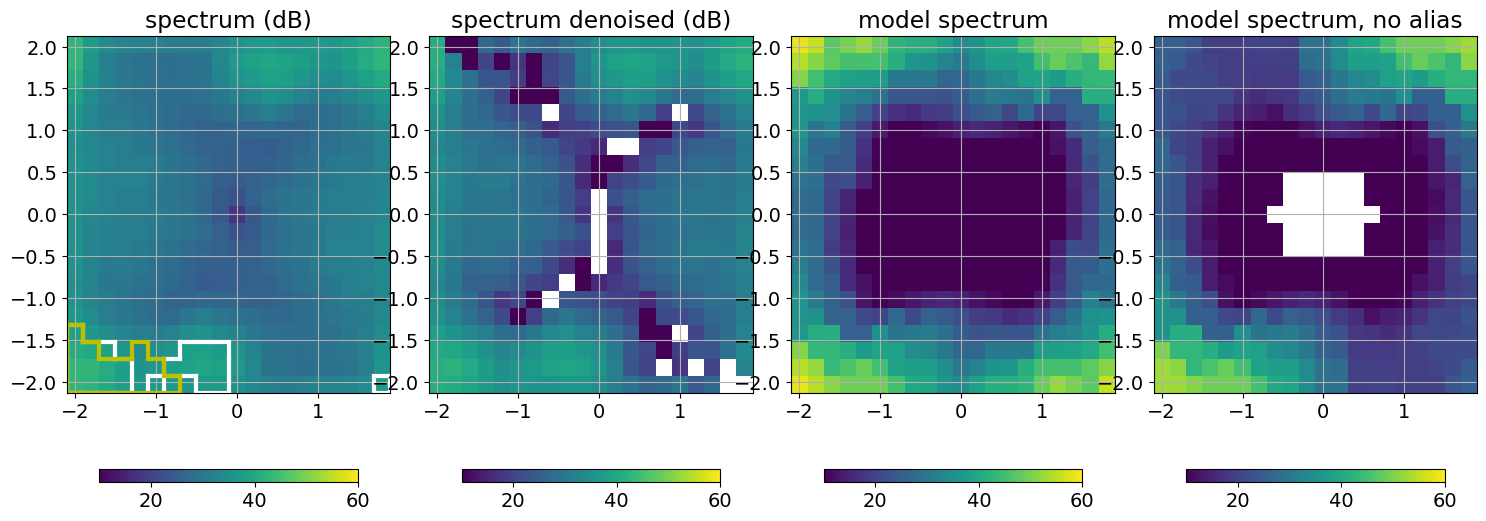

In [211]:
# Checks a few things on masks

# selects one file at a given latitude: 
file_box='ANIMATIONS/SWOT_swell_spectra_546_010_left_44.00S.npz'
#lonlat=f'{abs(latc):05.2f}'+hemiNS[int(np.sign(latc))]
#filetag='SWOT_'+cycle+'_'+tracks+'_'+side+'_'+days+'_'+lonlat
    
data = np.load(file_box,allow_pickle=True)
for k in data.keys():
    exec(k+' = data["'+k+'"]')


dlat=np.sin(-trackangle*np.pi/180)

amask2,bmask2=SWOTdefine_swell_mask_simple(E_WW3_noa_H2/HH2,coh,ang,sig0mean,dlat,kx2,ky2,mask_choice=-3)
#amask2,bmask2=SWOTdefine_swell_mask_simple(E_SWOT/HH2,coh,ang,sig0mean,dlat,kx2,ky2,mask_choice=1)

vertices=swell.SWOTspec_mask_polygon(E_SWOT,amask) 
vertices2=swell.SWOTspec_mask_polygon(E_SWOT,amask2) 

fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(15,6))
plt.subplots_adjust(left=0.05,bottom=0.07, top=0.92,wspace=0.12,right=0.99)
im=ax[0].pcolormesh(kx2*1000,ky2*1000,10*np.log10(E_SWOT/HH2),cmap='viridis',rasterized=True,vmin=10, vmax=60)
_=plt.colorbar(im,ax=ax[0],label='', location='bottom',shrink=0.8)
_=ax[0].set_title('spectrum (dB)')

dkx=kx2[0,1]-kx2[0,0]
dky=ky2[1,0]-ky2[0,0]
for ind in range(len(vertices) // 4):
           xy2=np.asfarray(vertices[ind*4:(ind+1)*4])
           ax[0].plot(kx2[0,0]*1000+1000*dkx*xy2[0:2],ky2[0,0]*1000+1000*dky*xy2[2:4], color='w',lw=3)

for ind in range(len(vertices2) // 4):
           xy2=np.asfarray(vertices2[ind*4:(ind+1)*4])
           ax[0].plot(kx2[0,0]*1000+1000*dkx*xy2[0:2],ky2[0,0]*1000+1000*dky*xy2[2:4], color='y',lw=3)


Ekth,kn1,theta1,Eta_SWOT_nonoise=swell.SWOT_denoise_isotropic(E_SWOT/HH2,kx2,ky2)
            

im=ax[1].pcolormesh(kx2*1000,ky2*1000,10*np.log10(Eta_SWOT_nonoise),cmap='viridis',rasterized=True,vmin=10, vmax=60)
_=plt.colorbar(im,ax=ax[1],label='', location='bottom',shrink=0.8)
_=ax[1].set_title('spectrum denoised (dB)')

im=ax[2].pcolormesh(kx2*1000,ky2*1000,10*np.log10(E_WW3_obp_H2/HH2),cmap='viridis',rasterized=True,vmin=10, vmax=60)
_=plt.colorbar(im,ax=ax[2],label='', location='bottom',shrink=0.8)
_=ax[2].set_title('model spectrum')

im=ax[3].pcolormesh(kx2*1000,ky2*1000,10*np.log10(E_WW3_noa_H2/HH2),cmap='viridis',rasterized=True,vmin=10, vmax=60)
_=plt.colorbar(im,ax=ax[3],label='', location='bottom',shrink=0.8)
_=ax[3].set_title('model spectrum, no alias')


plt.show()


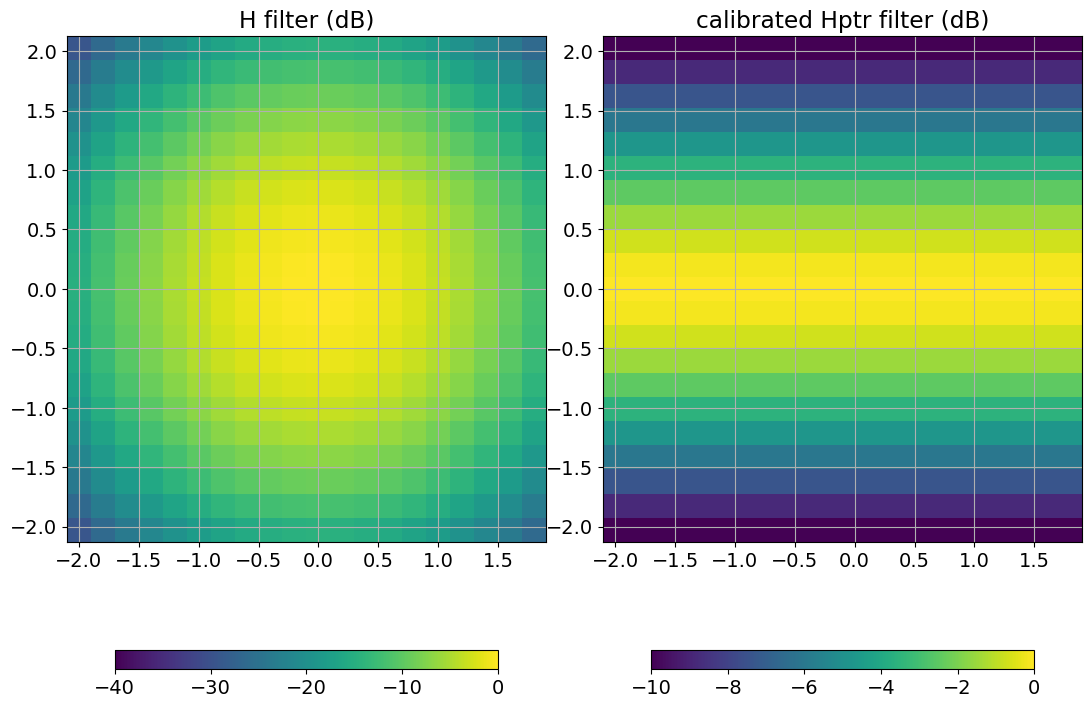

In [139]:
# Checks a few things on filters
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10.8,8.5))
plt.subplots_adjust(left=0.05,bottom=0.07, top=0.92,wspace=0.12,right=0.99)
im=ax[0].pcolormesh(kx2*1000,ky2*1000,10*np.log10(HH),cmap='viridis',rasterized=True,vmin=-40, vmax=0)
_=plt.colorbar(im,ax=ax[0],label='', location='bottom',shrink=0.8)
_=ax[0].set_title('H filter (dB)')
          
    
im=ax[1].pcolormesh(kx2*1000,ky2*1000,10*np.log10(HH3/HH),cmap='viridis',rasterized=True,vmin=-10, vmax=0)
_=plt.colorbar(im,ax=ax[1],label='', location='bottom',shrink=0.8)
_=ax[1].set_title('calibrated Hptr filter (dB)')
plt.show()

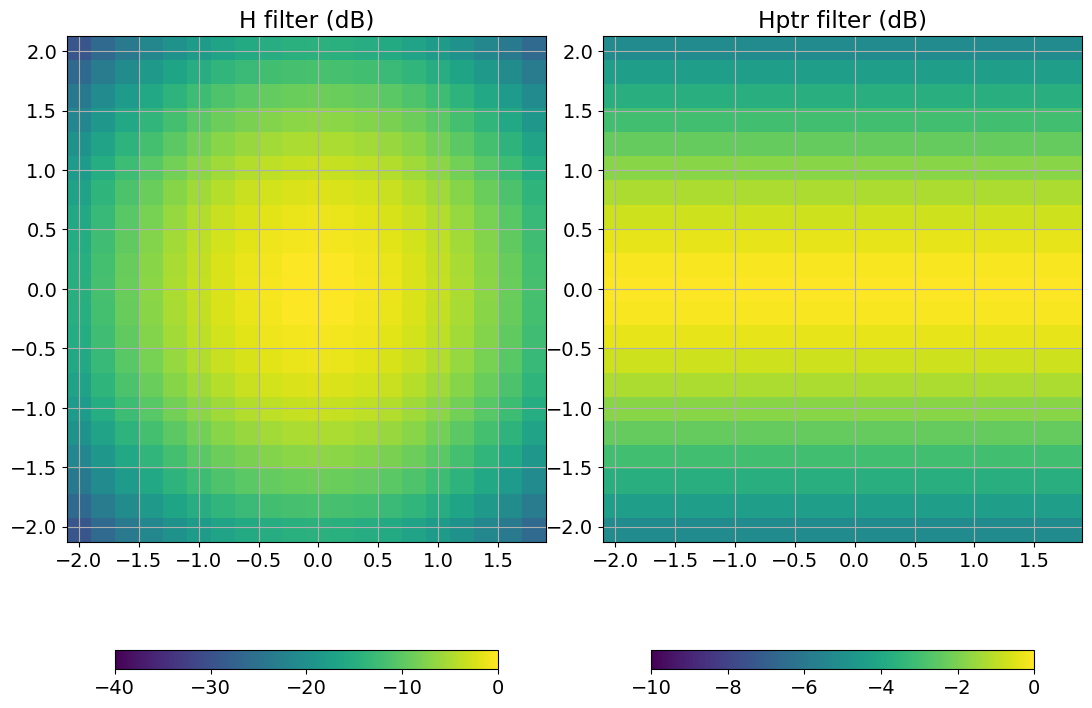

In [16]:
# Checks a few things on filters
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10.8,8.5))
plt.subplots_adjust(left=0.05,bottom=0.07, top=0.92,wspace=0.12,right=0.99)
im=ax[0].pcolormesh(kx2*1000,ky2*1000,10*np.log10(HH),cmap='viridis',rasterized=True,vmin=-40, vmax=0)
_=plt.colorbar(im,ax=ax[0],label='', location='bottom',shrink=0.8)
_=ax[0].set_title('H filter (dB)')
          
    
im=ax[1].pcolormesh(kx2*1000,ky2*1000,10*np.log10(HH2/HH),cmap='viridis',rasterized=True,vmin=-10, vmax=0)
_=plt.colorbar(im,ax=ax[1],label='', location='bottom',shrink=0.8)
_=ax[1].set_title('Hptr filter (dB)')
plt.show()
